<a href="https://colab.research.google.com/github/mariluvarela/Clases-de-Ciencia-de-Datos/blob/main/Modelos_de_Clustering_Actividades_%5BSolucion%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de Clustering con SciKit-Learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from zipfile import ZipFile
import io
from urllib.request import urlopen
import requests

+ ## Descripción y Exploración del Dataset:

In [ ]:
# Se importa un dataset que contiene datos de un mall y sus consumidores
# Source: https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python
data=pd.read_csv("https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv",
                    sep = ",", encoding='utf-8')
data.rename({'Annual Income (k$)':'Income','Spending Score (1-100)':'Spending Score'},axis=1,inplace=True)
display(data.head(5))


,CustomerID,Genre,Age,Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Aplicamos metodo .info()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Genre           200 non-null    object
 2   Age             200 non-null    int64 
 3   Income          200 non-null    int64 
 4   Spending Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# Aplicamos metodo describe()
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Income,200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score,200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


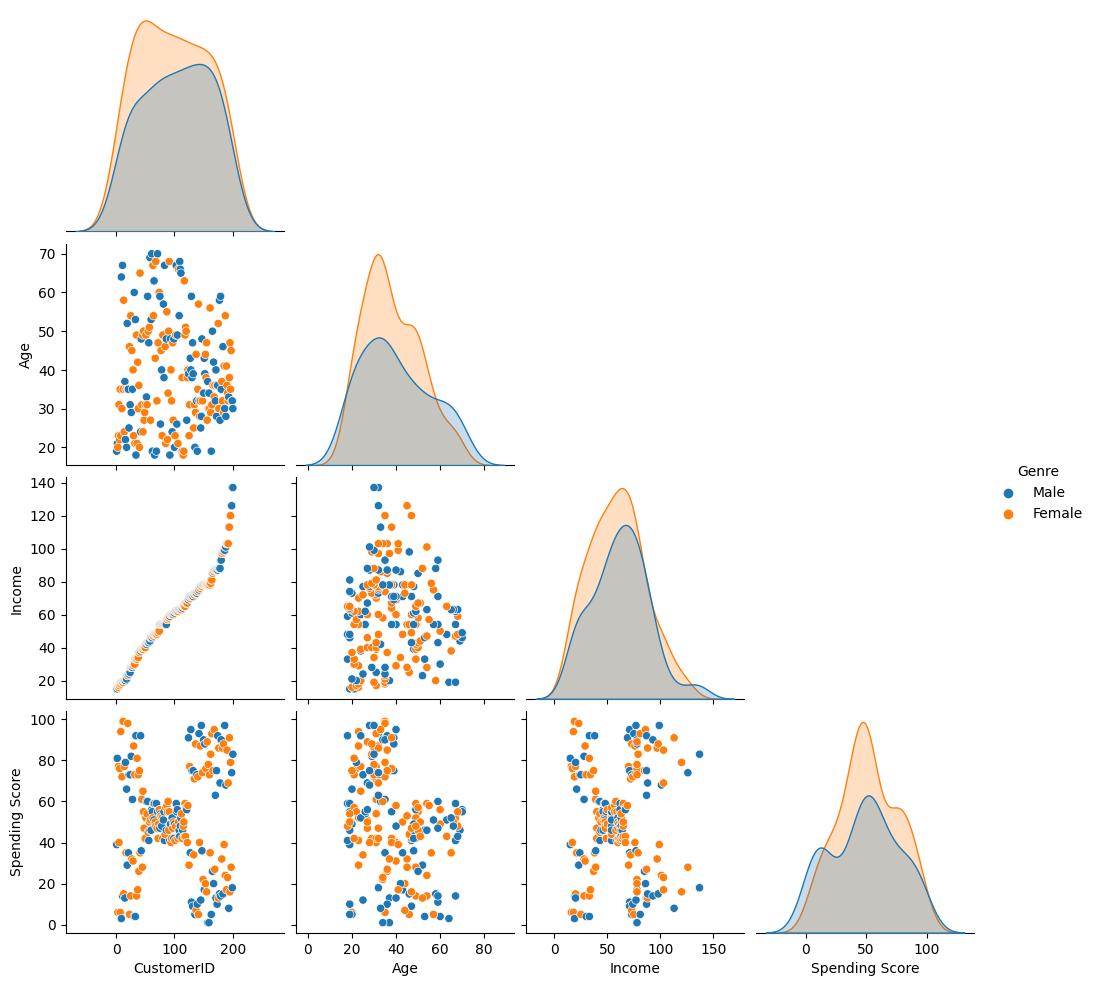

In [ ]:
# Hacemos un pairplot de las variables
plot01 = sns.pairplot(data, hue='Genre', corner=True)

## 1. Clustering por K-Means
#### ACTIVIDAD: _Implementar K-means al dataset del mall pero utilizando todas las features y comparar el resultado con el obtenido en la practica en la clase_


In [ ]:
# Importamos las librerias necesarias para implementar un modelo K-Means y un estandarizador de variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score

In [ ]:
# ACTIVIDAD: Estandarizar las variables utilizando StandardScaler y MinMaxScaler. Comparar los resultados

# OPCIONAL: Debido a que el genero es una variable categorica no puede ser utilizada de forma directa. ¿Como se resuelve este problema?. Aplicarlo.
X = data.drop(columns='Genre')

# Estandarizamos las variables:
scaler01 = StandardScaler()
#scaler02 = MinMaxScaler()

X_scaled = pd.DataFrame(scaler01.fit_transform(X), columns=X.columns);

In [ ]:
# ACTIVIDAD: Instanciar el modelo de kmeans y guardar en las variables 'labels' y 'centroids' las etiquetas generadas y las coordenadas de los centroides respectivamente
kmeans = KMeans(n_clusters = 5,
                n_init = 10,
                max_iter = 50)
kmeans.fit(X_scaled)

# Guardamos las etiquetas generadas por el modelo y las coordenadas de los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
X_scaled.columns

Index(['CustomerID', 'Age', 'Income', 'Spending Score'], dtype='object')

Text(0, 0.5, 'Spending Score')

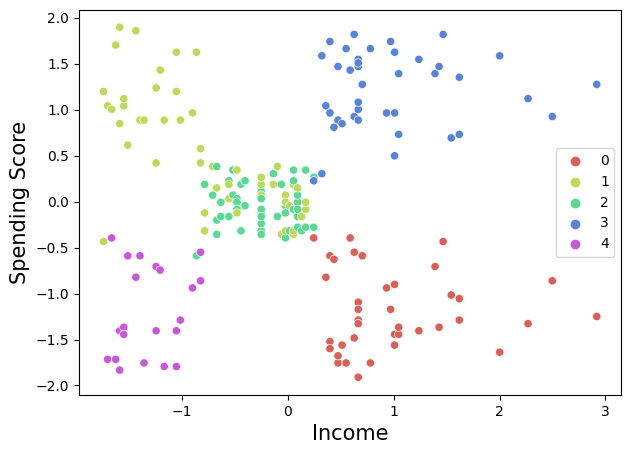

In [ ]:
# Creamos un Scatterplot discriminando los puntos por el cluster al que pertenecen (segun el modelo)
# Utilizamos las mismas variables que en la practica de la clase para comparar el clustering producido con todas las features
fig, (ax01) = plt.subplots(1, 1, figsize=(7,5))

X_plot02 = X_scaled
# Hint: Probar graficando distintos pares de las features ('CustomerID', 'Age', 'Income', 'Spending Score')
x_feature = 'Income'
y_feature = 'Spending Score'

plot02 = sns.scatterplot(x = X_plot02[x_feature],y = X_plot02[y_feature],hue = labels,legend = 'full',
                         palette = sns.color_palette("hls", 5), ax = ax01)
plot02.set_xlabel('Income',fontsize = 15)
plot02.set_ylabel('Spending Score',fontsize = 15)

In [ ]:
# Imprimimos las etiquetas
labels

array([1, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 2, 1, 4, 1,
       4, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 3, 0, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3], dtype=int32)

### 1.2 Cómo elegir k y evaluar el clustering
#### ACTIVIDAD: Calcular las metricas de la suma de distancias al cuadrado y la silueta para distintos valores de K

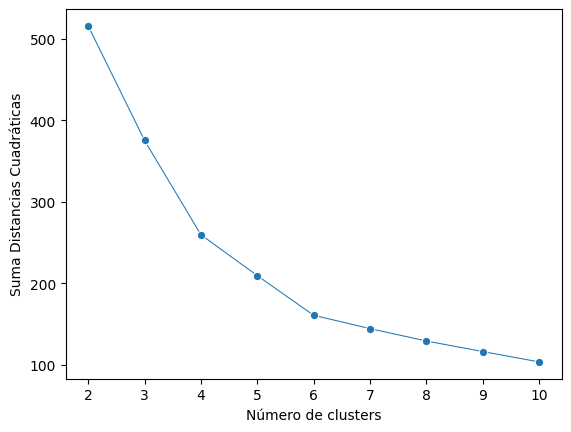

In [ ]:
# Se instancia una lista vacía, en la que se almacenará la suma de distancias
sq_distances = []
# ACTIVIDAD: Elegir un set de valores de K apropiados para probar
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

# Se entrenan 9 K-means con los valores de K almacenados en k_values
for k in k_values:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 0) # Se instancia K-means, con el valor de K dado
    kmeans.fit(X_scaled) # Se aplica método fit
    sq_distances.append(kmeans.inertia_) # Se almacena la suma de distancias (se aplica el método inertia_)

# Se graficó las sumas de las distancias
sns.lineplot(x=k_values, y=sq_distances, marker='o', size=30, legend=False);
plt.ylabel('Suma Distancias Cuadráticas');plt.xlabel('Número de clusters');

+ Aplicamos métrica Silhouette

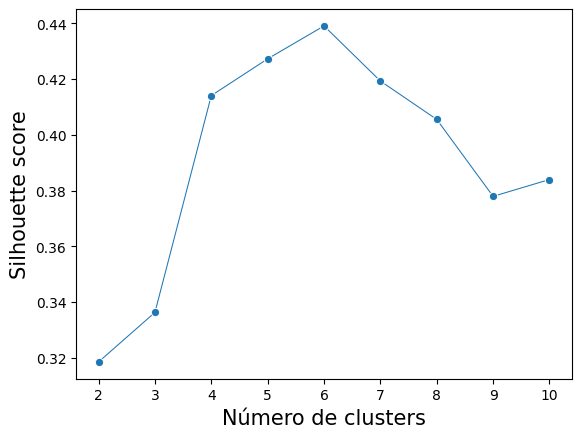

In [ ]:
# Se instancia una lista vacía, en la que se almacenará la métrica Silhouette
sil_distances = []
#k_values =

for k in k_values:
    kmeans = KMeans(n_clusters = k, n_init = 10, random_state = 0) # Se instancia K-means, con el valor de K dado
    kmeans.fit(X_scaled) # Se aplica método fit
    score = silhouette_score(X_scaled,kmeans.labels_) # Se calculan las métricas Silhouette
    sil_distances.append(score) # Se almacena la suma de distancias (se aplica el método inertia_)

# Se graficó las sumas de las distancias
sns.lineplot(x = k_values, y = sil_distances, marker = 'o', size = 30, legend = False);
plt.ylabel('Silhouette score',fontsize=15);plt.xlabel('Número de clusters',fontsize=15);

#### ¿Cual es la mejor opcion para el valor de K siguiendo los resultados de las metricas?

#### OPCIONAL: Añadir al dataframe original las etiquetas generadas por K-Means con las mejores metricas y hacer una exploracion del mismo teniendo en cuenta los clusters
###### Hint: Usar mascaras para separar los valores sin crear nuevos dataframes
###### Hint2: Metricas que pueden ser de interes:
+ Cantidad de elementos en cada cluster (¿hay alguno que sea muy pequeño o muy grande?)
+ Valores medios de las variables en cada cluster
+ Proporcion de genero en cada cluster

In [ ]:
# Descomentar en caso de resolver el ejercicio opcional
# data_labeled = data
# data_labeled['label'] = labels
# data_labeled

## 2. Clustering Jerárquico
#### ACTIVIDAD: _Implementar algoritmo de clustering jerarquico a un dataset descriptivo de cualidades de vinos_

In [ ]:
# Importamos metodos de la libreria scipy
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

# Notar que en ese caso utilizamos una nueva libreria :scipy
# Mas informacion acerca de la libreria: https://docs.scipy.org/doc/scipy/tutorial/general.html
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html

In [ ]:
from google.colab import files
uploaded = files.upload()

# https://www.kaggle.com/datasets/harrywang/wine-dataset-for-clustering

Saving wine-clustering.csv to wine-clustering.csv


In [ ]:
# Importamos el dataset y hacemos un head()
df_wine = pd.read_csv('wine-clustering.csv')
df_wine.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# ACTIVIDAD: Explorar el dataset

In [ ]:
# ACTIVIDAD: Estandarizar las variables

# Estandarizamos las variables:
scaler01 = StandardScaler()
#scaler02 = MinMaxScaler()

X_wine_scaled = pd.DataFrame(scaler01.fit_transform(df_wine), columns=df_wine.columns);

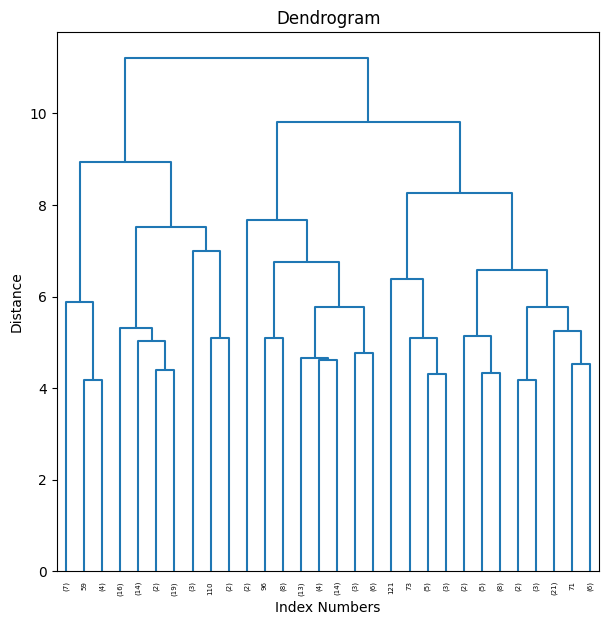

In [ ]:
# Instanciamos el modelo de clustering jerarquico, especificando el metodo de aglomeracion ('complete', ' ward', 'average', 'single')
# Hint: Probar con distinto tipos de linkage y comparar el resultado en el dendrograma
linkage_type = 'complete'
Z = linkage(X_wine_scaled, linkage_type)

# Graficamos el dendrograma
plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Index Numbers')
plt.ylabel('Distance')
dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=5.,
    color_threshold=0,
    truncate_mode='lastp'
)
plt.show()

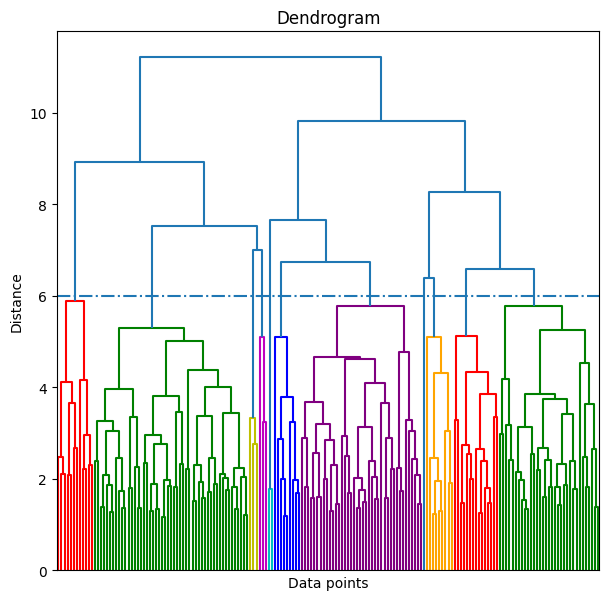

In [ ]:
# ACTIVIDAD: cambiar el umbral para ver como cambia la conformacion de clusters

threshold = 6

from scipy.cluster import hierarchy

plt.figure(figsize=[7,7])
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')

color_palette=['r','g','y','m','c', 'b', 'purple', 'orange'];

hierarchy.set_link_color_palette(color_palette)

dendrogram(
    Z,
    leaf_rotation = 90.,
    leaf_font_size = 5.,
    color_threshold = threshold,
)
plt.hlines(threshold, 0, 2000,linestyle='-.')
plt.xticks([])
plt.show()